In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [ ]:
df = sns.load_dataset('mpg')

df1 = df.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


In [ ]:
categoricas = list(df.loc[:, df.nunique() < 14])
categoricas.append('name')
df[categoricas] = df[categoricas].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    category
dtypes: category(4), float64(4), int64(1)
memory usage: 29.1 KB


In [ ]:
df.dropna(inplace=True)


In [ ]:
y = df['mpg']
X = df['horsepower']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        02:42:23   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Is there a relationship between the predictor and the re
sponse?
    R) Theres not enough evidence to reject the alternative hypothesis, so theres a strong response between these variables.

2. How strong is the relationship between the predictor and
 the response?
    R) The relationship is strong and significant because the t-statistic is large (-24.489) and the p-value is very low, indicating a statistically significant relationship.

3. Is the relationship between the predictor and the response
 positive or negative?

    R) The relationship is negative. As horsepower increases, the miles per gallon (mpg) decreases, as indicated by the negative coefficient for horsepower (-0.1578).
4. What is the predicted mpg associated with a horsepower of
 98? What are the associated 95% confidence and prediction
 intervals?

    R) The predicted mpg for a horsepower of 98 is 24.47 miles per gallon with a 95% confidence interval. 95 times of a hundred the coefficient will vary in this range 	[-0.171	-0.145]

Plot the response and the predictor. Use the abline() function
 to display the least squares regression line.

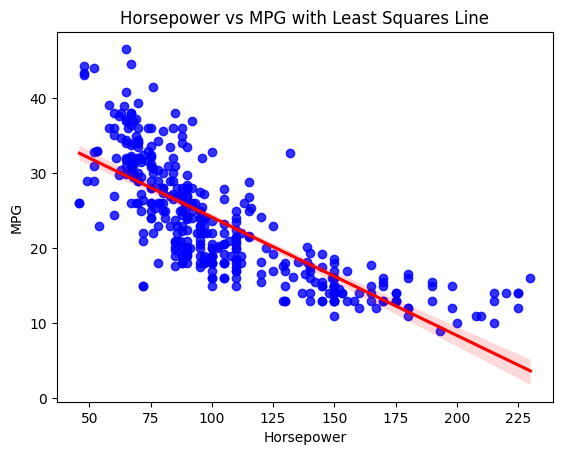

In [ ]:
sns.regplot(x='horsepower', y = 'mpg', data = df, scatter_kws = {'color': 'blue'}, line_kws= {'color': 'red'})
plt.title('Horsepower vs MPG with Least Squares Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Use the plot() function to produce diagnostic plots of the least
 squares regression fit. Comment on any problems you see with
 the fit.

    R) Clearly we can see theres a curve in the trend of the points. In order to get a better fit we need to add a cuadratic term.
    The residuals have a cuadratic not random pattern.

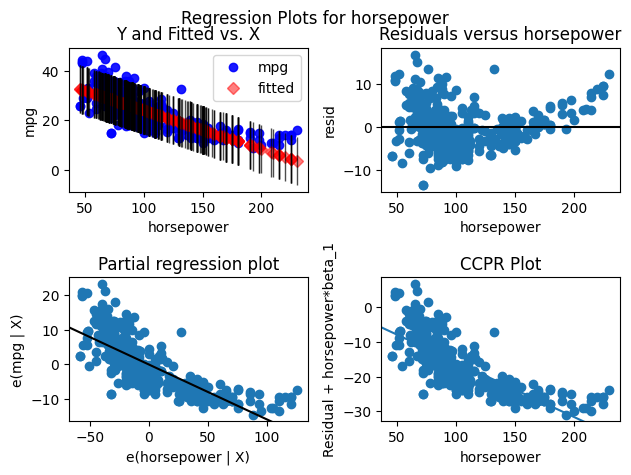

In [ ]:
sm.graphics.plot_regress_exog(model, 'horsepower')
plt.show()

Produce a scatterplot matrix which includes all of the variables
 in the data set.

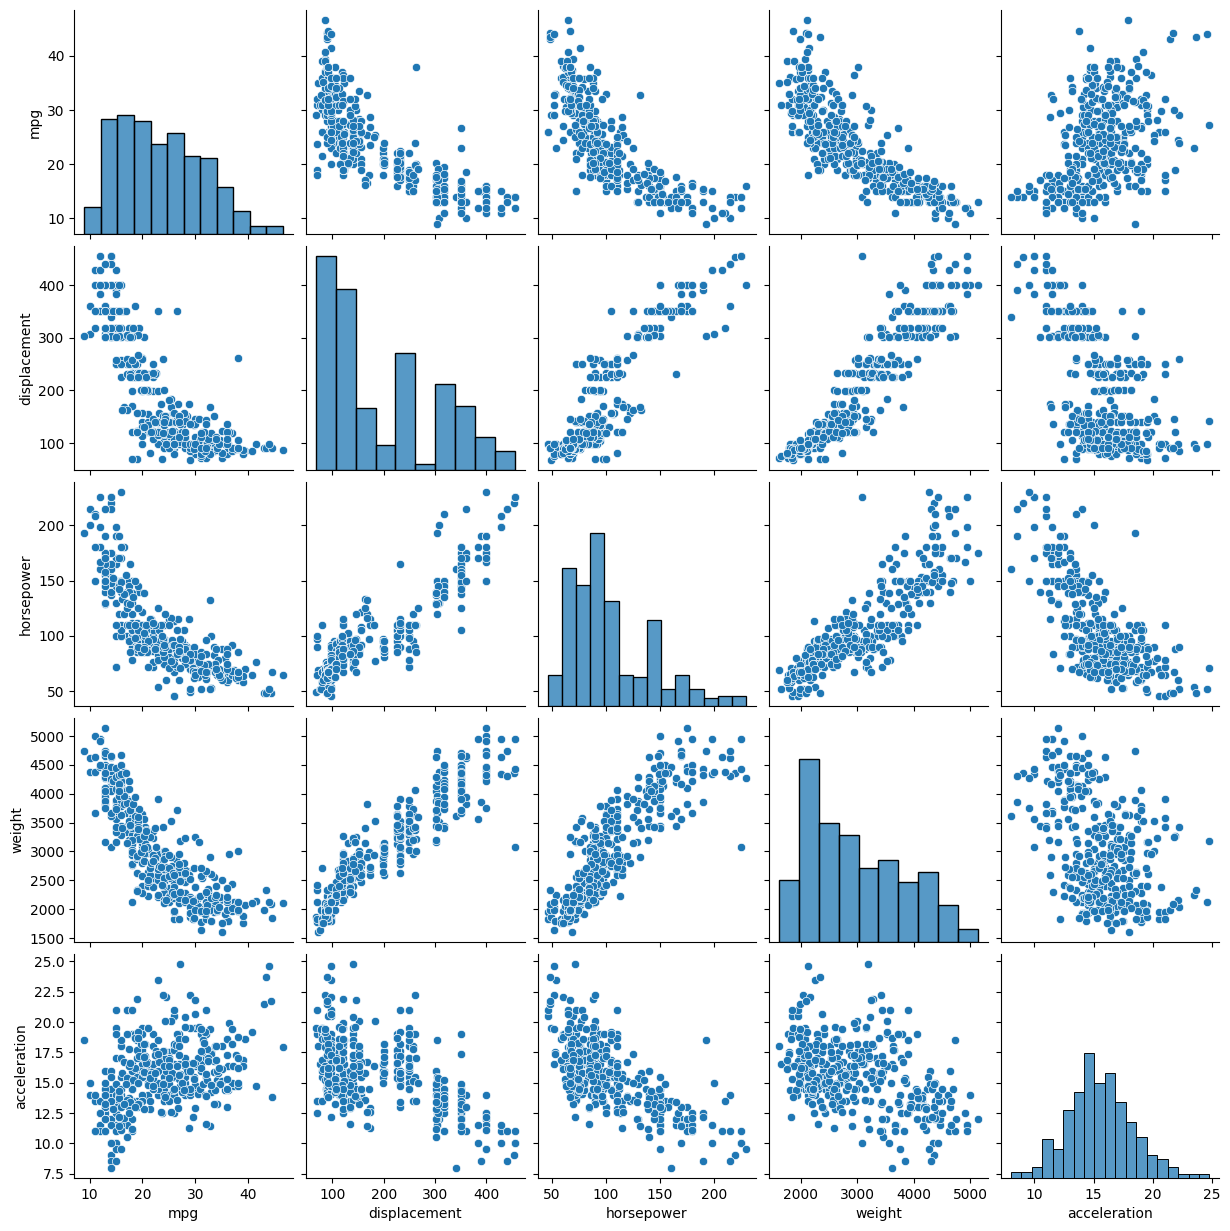

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Compute the matrix of correlations between the variables using
 the function cor(). You will need to exclude the name variable, cor()
 which is qualitative.

<Axes: >

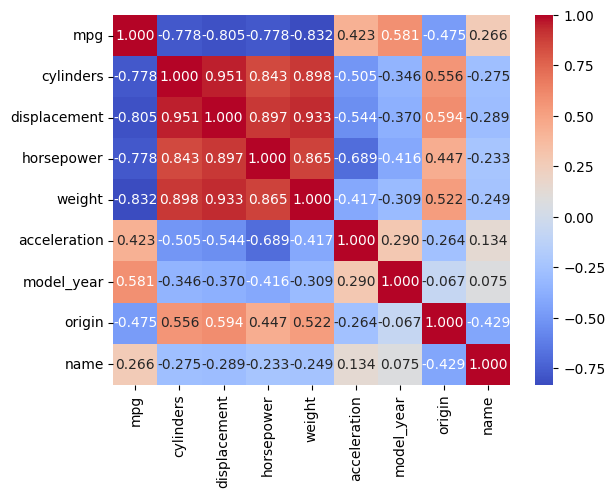

In [ ]:
from sklearn.preprocessing import LabelEncoder

df1.dropna(inplace = True)

le = LabelEncoder()
df1['name'] = le.fit_transform(df1['name'])
df1['origin'] = le.fit_transform(df1['origin'])


sns.heatmap(df1.corr(), annot = True, fmt = '3.3f', cmap = 'coolwarm')

In [ ]:
y = df1['mpg']
X = df1.drop(['mpg', 'name'], axis = 1)
X = sm.add_constant(X)

mult_lin = sm.OLS(y, X).fit()

mult_lin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.62e-138
Time:                        02:43:10   Log-Likelihood:                -1025.6
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     384   BIC:                             2099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.0564      4.651     -3.452      0.001     -25.201      -6.911
cylinders       -0.4004      0.324     -1.237      0.217      -1.037       0.236
displacement     0.0202      0.008      2.643      0.009       0.005       0.035
horsepower      -0.0102      0.014     -0.749      0.454      -0.037       0.017
weight          -0.0070      0.001    -10.752      0.000      -0.008      -0.006
acceleration     0.0806      0.099      0.811      0.418      -0.115       0.276
model_year       0.7960      0.052     15.292      0.000       0.694       0.898
origin          -1.3397      0.286     -4.677      0.000      -1.903      -0.776
==============================================================================
Omnibus:                       22.081   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.175
Skew:                           0.438   Prob(JB):                     1.70e-07
Kurtosis:                       4.069   Cond. No.                     8.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 1. Is there a relationship between the predictors and the response?
    R) Yes theres a strong relationship between the predictors and the response with a 0.82 R squared

 2. Which predictors appear to have a statistically significant relationship to the response?

    R) All are significant except the following:

    Cylinders: 0.217 -> p-value > 0.05

    Horsepower: 	0.454 -> p-value > 0.05

    Acceleration: 0.418 -> p-value > 0.05


 3. What does the coefficient for the year variable suggest?

    R) the coefficient for model_year is 0.7960, which means that for each additional year in the model, mpg (miles per gallon) increases by an average of 0.7960 units. In other words, newer cars tend to have higher mpg, implying better fuel efficiency.


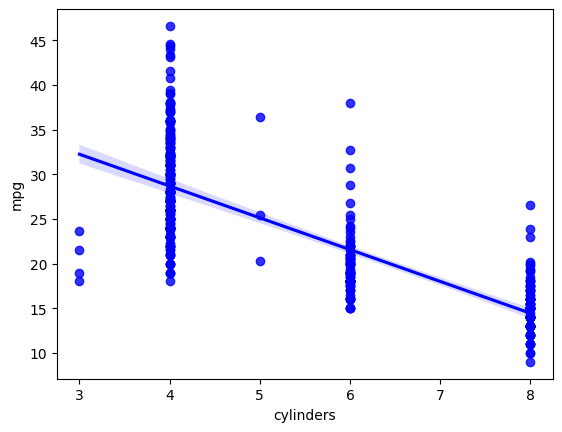

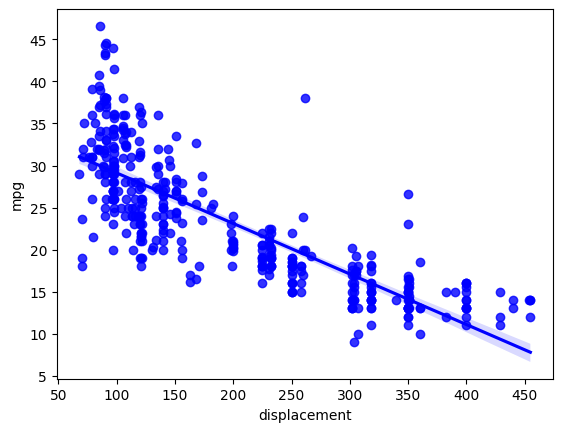

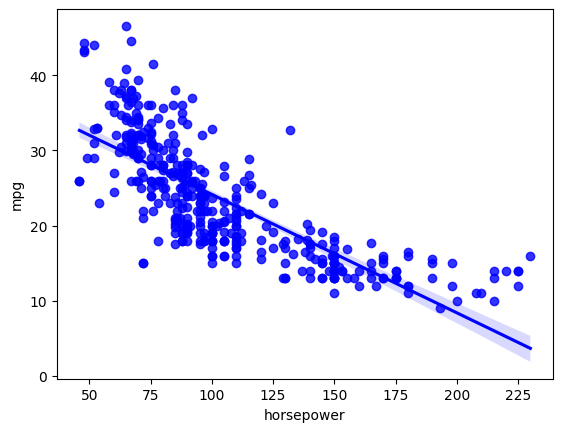

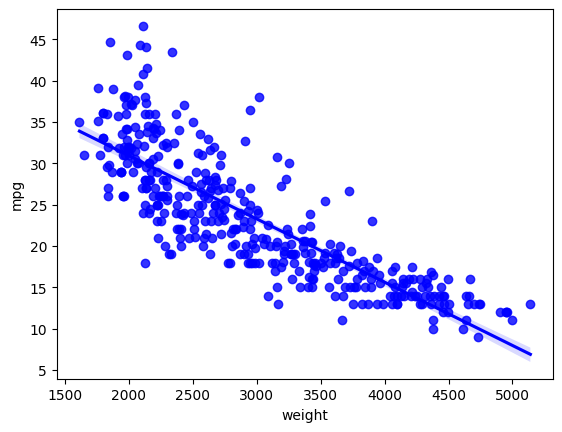

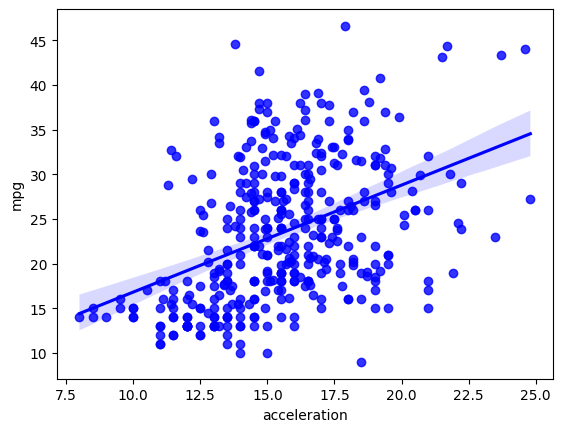

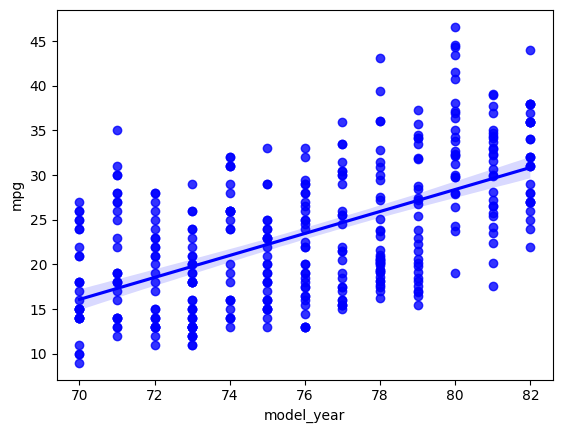

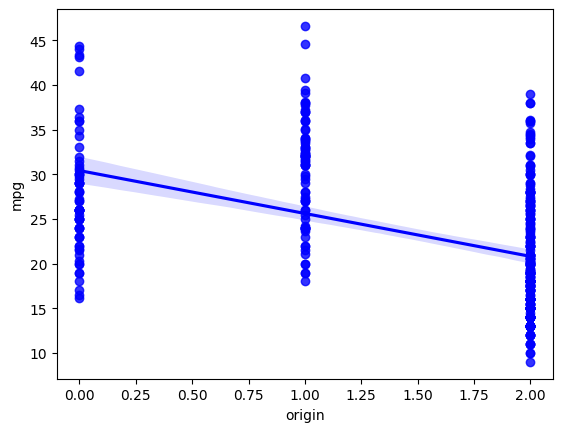

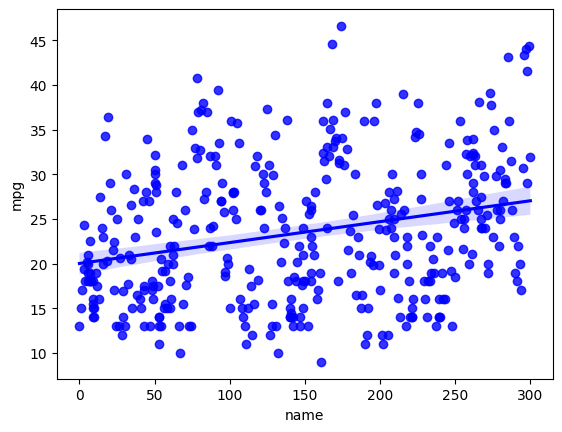

In [ ]:
 for col in df1.columns:
    if col != 'mpg':
        sns.regplot(x = df1[col], y = 'mpg', data = df1, line_kws={'color': 'blue'}, scatter_kws = {'color': 'blue'})
        plt.show()

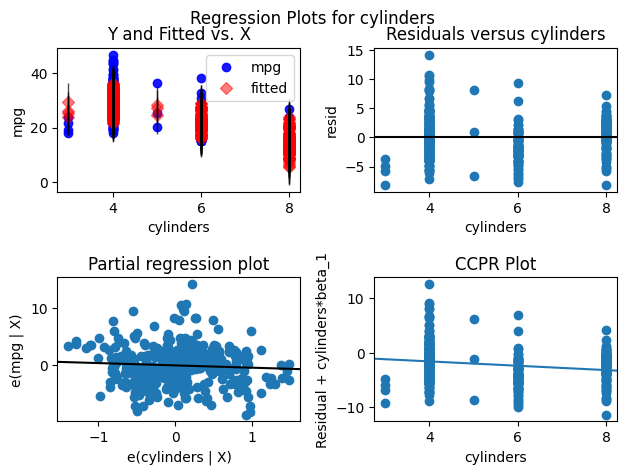

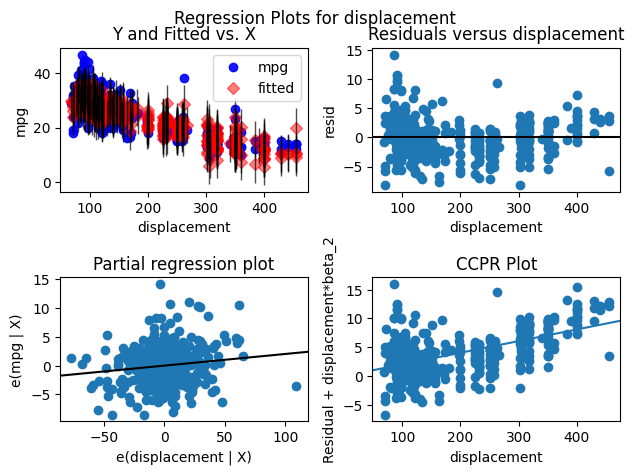

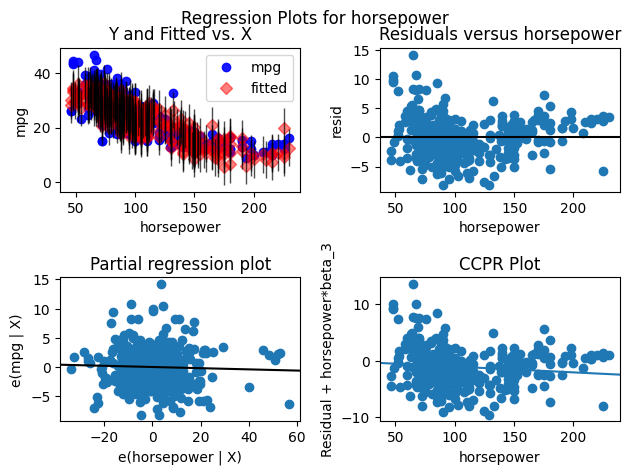

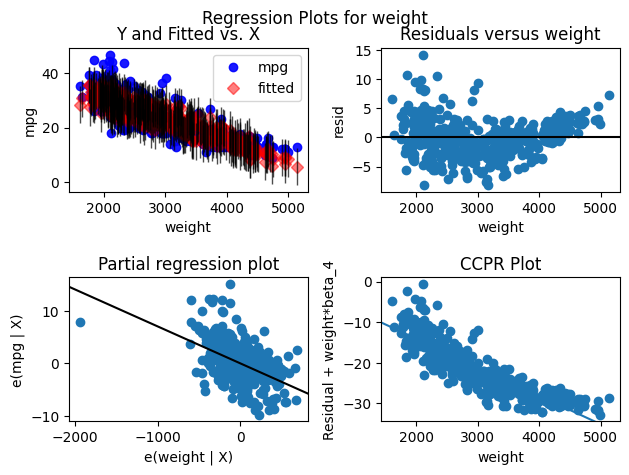

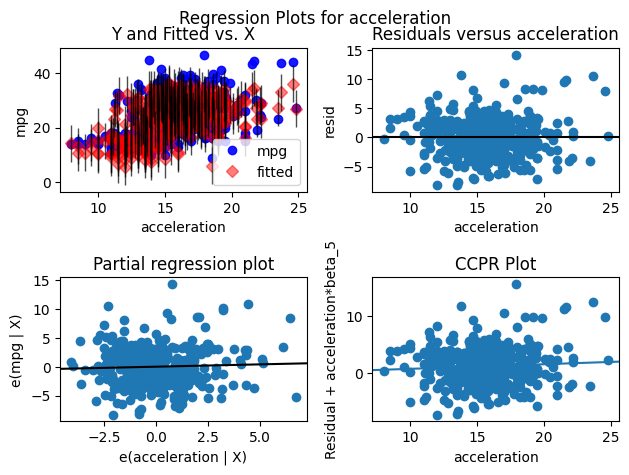

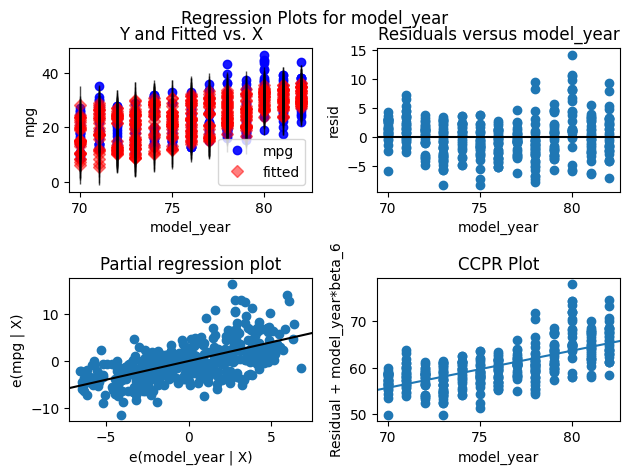

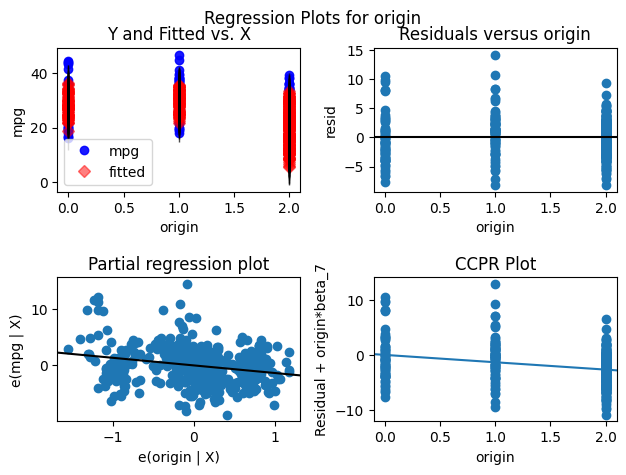

In [ ]:
for col in X.columns:
    if col != 'const':
        sm.graphics.plot_regress_exog(mult_lin, col)



Use the * and : symbols to fit linear regression models with
 interaction effects. Do any interactions appear to be statistically
 significant?

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
y = df1['mpg']

X = df1.drop(['mpg', 'name'], axis = 1)
X = sm.add_constant(X)

formula = 'mpg ~ model_year * weight + displacement * cylinders + horsepower + displacement + weight + acceleration + model_year + origin'

model_inter = smf.ols(formula=formula, data=df1).fit()

model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     268.4
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          3.49e-159
Time:                        02:43:30   Log-Likelihood:                -970.91
No. Observations:                 392   AIC:                             1962.
Df Residuals:                     382   BIC:                             2002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -92.4834     13.704     -6.749      0.000    -119.429     -65.538
model_year                 1.9263      0.170     11.317      0.000       1.592       2.261
weight                     0.0258      0.005      5.702      0.000       0.017       0.035
model_year:weight         -0.0004   5.98e-05     -6.978      0.000      -0.001      -0.000
displacement              -0.0587      0.014     -4.302      0.000      -0.086      -0.032
cylinders                 -1.8392      0.407     -4.521      0.000      -2.639      -1.039
displacement:cylinders     0.0105      0.002      6.226      0.000       0.007       0.014
horsepower                -0.0492      0.013     -3.913      0.000      -0.074      -0.024
acceleration               0.1187      0.087      1.363      0.174      -0.053       0.290
origin                    -0.8445      0.264     -3.203      0.001      -1.363      -0.326
==============================================================================
Omnibus:                       33.596   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.406
Skew:                           0.469   Prob(JB):                     3.12e-16
Kurtosis:                       4.869   Cond. No.                     2.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Try a few different transformations of the variables, such as
 log(X), √X, X2. Comment on your findings.

In [ ]:
df1['horsepower_squared'] = df1['horsepower'] ** 2
df1['log_weight'] = np.log1p(df1['weight'])
df1['acceleration_squared'] = df1['acceleration'] ** 2
df1['displacement_squared'] = df1['displacement'] ** 2


y = df1['mpg']

X = df1.drop(['mpg', 'name'], axis = 1)

X = sm.add_constant(X)

formula = 'mpg ~ log_weight + acceleration_squared + displacement_squared + (model_year) + displacement_squared * (model_year)  + origin '

model_final = smf.ols(formula=formula, data=df1).fit()

model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     396.8
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.01e-161
Time:                        02:43:34   Log-Likelihood:                -974.73
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     385   BIC:                             1991.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         118.6601     10.163     11.675      0.000      98.678     138.642
log_weight                        -21.9245      1.139    -19.257      0.000     -24.163     -19.686
acceleration_squared                0.0077      0.002      3.829      0.000       0.004       0.012
displacement_squared                0.0004   7.25e-05      5.421      0.000       0.000       0.001
model_year                          1.0201      0.057     17.889      0.000       0.908       1.132
displacement_squared:model_year -4.944e-06   9.99e-07     -4.949      0.000   -6.91e-06   -2.98e-06
origin                             -0.9085      0.234     -3.882      0.000      -1.369      -0.448
==============================================================================
Omnibus:                       30.021   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.908
Skew:                           0.421   Prob(JB):                     2.19e-14
Kurtosis:                       4.772   Cond. No.                     3.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""